# Imports and Setting Defenitions

In [1815]:
import matplotlib.pyplot as plt
import numpy as np
import math
import cv2

In [1816]:
N_FREQ_CHANNELS = 512
N_TIME_SAMPLES = 1000
NOISE_STRENGTH = 1 # Noise will be in range [0, NOISE_STRENGTH)
FRB_STRENGTH = 2 # FRB intensities Will be in range [0, FRB_STRENGTH)

# Coefficients and constants in f(x)=a(x-z)**2+c
a = np.random.random()/100
c = -np.random.random()*50
z = np.random.random()*(N_TIME_SAMPLES-50)+50

# Upper and lower cut off of the parabola
upper_bound = np.random.random()*(N_FREQ_CHANNELS-100)+100
lower_bound = max(np.random.random()*upper_bound-100, 0)

# For Line Detection
N_SLOPE_SAMPLES = 10

# Experimental
DISPERSE_FRB = True # Disperse FRB as a function of frequency
DISPERSION_COEF = 3*10**12 # The Dispersion Coef

# Create Fake Data

In [1817]:
# Create the raw data with background noise
data = np.random.rand(N_FREQ_CHANNELS, N_TIME_SAMPLES)*NOISE_STRENGTH

## Define Functions to Draw Parabola In Data (Modified Bresenham's line algorithm)

In [1818]:
def drawParabola(data, a, c, z, ub, lb):
    # Define f(x)
    f = lambda x: a*(x-z)**2 + c

    # For every x value in the domain [0, floor(z))
    for x in range(0, int(z)):
        y = f(x) # Get the corresponding y value

        # If the y value is in bounds
        if y < upper_bound and y > lower_bound:

            # Set the point
            data[int(y)][x] = val = np.random.random()*FRB_STRENGTH
            
            x_last = x-1
            y_last = f(x_last)

            # Fill in unfilled points on the parabola within the domain above
            data = drawBack(data, a, c, z, x_last, y_last, x, y)
            
            

    return data

In [1819]:
# Draws the parabolas point in between
def drawBack(data, a, c, z, x1, y1, x2, y2):
    # Defin |inverse of f|
    f_inv = lambda x: z + ( ( x - c ) / a )**0.5

    # Fill in all points that are interescted by f(x) around (x1, y1), (x2, y2)
    while(y1 > y2):
        diff = x2-f_inv(y1)-0.5

        val = np.random.random()*FRB_STRENGTH

        if y1 < len(data):
            if diff > 0 :
                data[int(y1)][x1] = val
            else:
                data[int(y1)][x2] = val
                
            if DISPERSE_FRB:
                data = disperse(data, x1, y1)

        y1 -= 1

    # Return the data with the filled in
    return data

In [1820]:
def disperse(data, x, y): 
    # Get the range to disperse the current frequency
    disperse_range = np.random.rand()*DISPERSION_COEF*(y+400)**-4

    # Do the actuall dispersion
    for i in range(-int(disperse_range/2), int(disperse_range/2)):
        if x+i >= 0 and x+i < len(data):
            data[int(y)][int(x+i)] = np.random.random()*FRB_STRENGTH
    
    return data

In [1821]:
data = drawParabola(data, a, c, z, upper_bound, lower_bound)

# Display the data

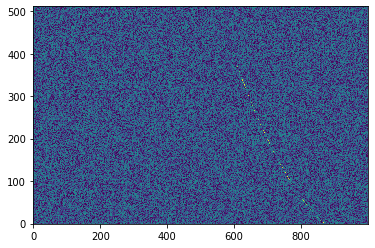

In [1822]:
plt.imshow(data, origin="lower", interpolation='nearest', aspect='auto')
plt.show()

In [1823]:
# Can be made more efficient
def regrid(data):
    coef = 511/N_FREQ_CHANNELS**0.5
    regrided_data = np.zeros((N_FREQ_CHANNELS, N_TIME_SAMPLES))
    new_y = lambda y: coef*y**0.5
    for x in range(len(data[0])):
        y_original = np.linspace(0, N_FREQ_CHANNELS, N_FREQ_CHANNELS)
        x_data = data[:, x]
        y_data = np.array([new_y(i) for i in y_original])
        y_data_new = np.interp(y_original, y_data, x_data)

        regrided_data[:, x] = y_data_new

    return regrided_data
    

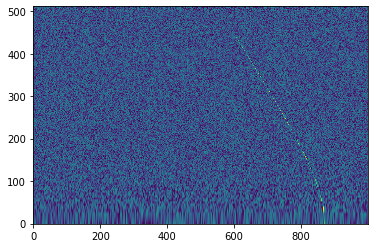

In [1824]:
regrided = regrid(data)
plt.imshow(regrided, origin="lower", interpolation='nearest', aspect='auto')
plt.show()  

In [1825]:
def lineDetection(data):
    

In [1827]:
print(lineDetection(regrided))

57.289961630759876 1
0.476348052153476 -57.289961630759876 1
0.4588929872252585 -57.289961630759876 1
0.44143792229704104 -57.289961630759876 1
0.4239828573688236 -57.289961630759876 1
0.4065277924406061 -57.289961630759876 1
0.38907272751238864 -57.289961630759876 1
0.37161766258417117 -57.289961630759876 1
0.3541625976559537 -57.289961630759876 1
0.33670753272773624 -57.289961630759876 1
0.31925246779951877 -57.289961630759876 1
0.3017974028713013 -57.289961630759876 1
0.28434233794308383 -57.289961630759876 1
0.26688727301486637 -57.289961630759876 1
0.24943220808664893 -57.289961630759876 1
0.2319771431584315 -57.289961630759876 1
0.21452207823021405 -57.289961630759876 1
0.1970670133019966 -57.289961630759876 1
0.17961194837377917 -57.289961630759876 1
0.16215688344556173 -57.289961630759876 1
0.1447018185173443 -57.289961630759876 1
0.12724675358912685 -57.289961630759876 1
0.10979168866090941 -57.289961630759876 1
0.09233662373269197 -57.289961630759876 1
0.07488155880447453 -57

TypeError: '>' not supported between instances of 'NoneType' and 'int'